# Deskewing artifacts in pyclesperanto-prototype 0.19.4 when not using orthogonal interpolation

In this notebook we demonstrate what happens if not using interpolation when deskewing an image stack: The result is produced faster and contains artifacts.

The bug demonstrated here was fixed in pyclesperanto-prototype 0.20.0 and may not be reproducible anymore with the current release.

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import pyclesperanto_prototype as cle

cle.select_device("RTX")

<NVIDIA GeForce RTX 3050 Ti Laptop GPU on Platform: NVIDIA CUDA (1 refs)>

## Loading example data

In [2]:
voxel_size_x_in_microns = 0.1449922
voxel_size_y_in_microns = 0.1449922
voxel_size_z_in_microns = 0.3

deskewing_angle_in_degrees = 30

The example image data shown below was kindly provided by 
[Ms Cindy Evelyn](https://imaging.wehi.edu.au/about-us/niall-geoghegan) and [Dr Niall Geoghegan](https://imaging.wehi.edu.au/about-us/niall-geoghegan) from the [Centre for Dynamic Imaging, WEHI, Melbourne, Australia](https://imaging.wehi.edu.au/) who used lattice light sheet microscopy to capture red blood cells and study the [malaria parasite invasion process](https://www.nature.com/articles/s41467-021-23626-7). The data is acquired using a Zeiss lattice lightsheet microscope.

In these so called raw data images taken with single-objective light sheet microscopes, the Z-plane is swept through the sample in a tilted way. This is not obvious when studying the Z-planes of the given stack:

In [3]:
original_image = imread('../../data/RBC_tiny.tif')
original_image.shape

(834, 118, 209)

To demonstrate the effect, we will now reduce the imaging data in Z; we remove planes and update the voxel size.

In [4]:
reduction_factor = 3

original_image = original_image[::reduction_factor]
voxel_size_z_in_microns = voxel_size_z_in_microns * reduction_factor

When looking at this image stack from the side, one can see the tilt of the light sheet orientation.

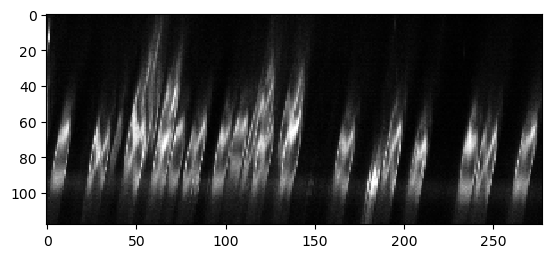

In [5]:
cle.imshow(original_image[:,:,100].T)

## Deskewing with linear interpolation

In [6]:
deskewed = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                       linear_interpolation=True)

deskewed.shape

(59, 1828, 209)

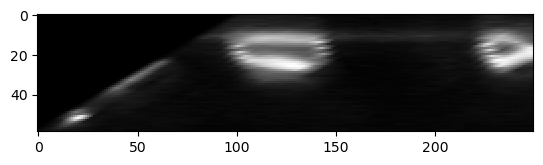

In [7]:
cle.imshow(deskewed[:,:250,100])

## Deskewing without linear interpolation

In [8]:
deskewed_wo_interpolation = cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=False)

deskewed_wo_interpolation.shape

(59, 1828, 209)

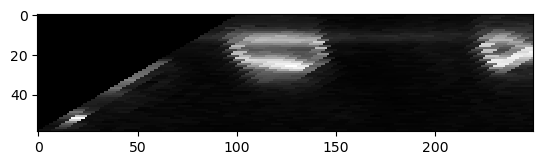

In [9]:
cle.imshow(deskewed_wo_interpolation[:,:250,100])

## Performance comparison

In [10]:
def deskew_with_interpolation():
    cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=True)

def deskew_without_interpolation():
    cle.deskew_y(original_image, 
                        angle_in_degrees=deskewing_angle_in_degrees, 
                        voxel_size_x=voxel_size_x_in_microns, 
                        voxel_size_y=voxel_size_y_in_microns, 
                        voxel_size_z=voxel_size_z_in_microns,
                        linear_interpolation=False)

In [11]:
%timeit deskew_with_interpolation()

29.8 ms ± 1.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit deskew_without_interpolation()

28.7 ms ± 868 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
